<a href="https://colab.research.google.com/github/imranrahman1997/30-days_30-projects/blob/main/Project_(1)_Heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = '/content/drive/MyDrive/30 days projects/framingham.csv'
data = pd.read_csv(dataset)
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

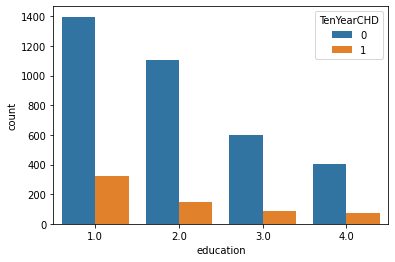

In [5]:
sns.countplot(x = 'education',hue = 'TenYearCHD' ,data = data)

In [6]:
data['education']

0       4.0
1       2.0
2       1.0
3       3.0
4       3.0
       ... 
4233    1.0
4234    3.0
4235    2.0
4236    1.0
4237    2.0
Name: education, Length: 4238, dtype: float64

In [7]:
data['education'].mean()

1.9789499153157513

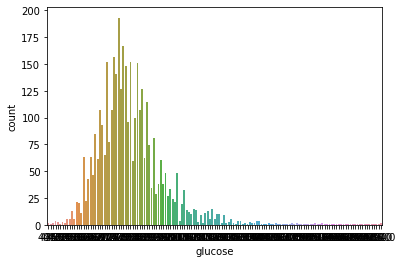

In [8]:
sns.countplot(x = 'glucose', data = data)

In [9]:
data['glucose'].value_counts

<bound method IndexOpsMixin.value_counts of 0        77.0
1        76.0
2        70.0
3       103.0
4        85.0
        ...  
4233     86.0
4234     68.0
4235     86.0
4236      NaN
4237    107.0
Name: glucose, Length: 4238, dtype: float64>

In [10]:
data['glucose'].mean()

81.96675324675324

In [11]:
data['glucose'].max()

394.0

In [12]:
data['glucose'].min()

40.0

In [13]:
data[['glucose', 'TenYearCHD']].groupby(['glucose'],as_index=False).mean().sort_values(by='TenYearCHD', ascending=False)

,glucose,TenYearCHD
142,394.0,1.0
126,255.0,1.0
84,130.0,1.0
98,155.0,1.0
101,163.0,1.0
...,...,...
108,183.0,0.0
109,186.0,0.0
110,191.0,0.0
111,193.0,0.0


In [14]:
data.shape

(4238, 16)

In [15]:
a = data[data['glucose'] > 150]  
a.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
37,1,52,1.0,0,0.0,0.0,0,1,1,178.0,160.0,98.0,40.11,75.0,225.0,0
44,0,53,3.0,0,0.0,1.0,0,1,1,311.0,206.0,92.0,21.51,76.0,215.0,1
66,0,62,1.0,0,0.0,0.0,0,1,1,212.0,190.0,99.0,29.64,100.0,202.0,0
443,0,60,1.0,0,0.0,0.0,0,0,1,260.0,95.5,59.0,25.94,90.0,160.0,0
763,0,58,1.0,0,0.0,0.0,1,1,1,267.0,157.0,94.0,33.32,92.0,205.0,1


In [16]:
b = data[data['glucose'] <= 150]  
b

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


In [17]:
a.shape

(50, 16)

In [18]:
b.shape

(3800, 16)

In [19]:
a['glucose'].interpolate(method ='linear', limit_direction ='forward')

37      225.0
44      215.0
66      202.0
443     160.0
763     205.0
952     216.0
965     163.0
1068    172.0
1238    186.0
1268    223.0
1363    325.0
1456    156.0
1485    268.0
1649    274.0
1674    292.0
1931    255.0
1997    206.0
2091    297.0
2234    173.0
2378    206.0
2406    386.0
2498    155.0
2503    215.0
2649    170.0
2801    320.0
2855    170.0
2891    254.0
2893    394.0
2909    394.0
2961    270.0
3002    244.0
3112    183.0
3327    167.0
3458    207.0
3606    177.0
3680    250.0
3749    294.0
3763    166.0
3817    332.0
3844    368.0
3849    348.0
3868    248.0
3971    370.0
3974    173.0
4042    193.0
4064    191.0
4076    256.0
4084    235.0
4096    210.0
4228    260.0
Name: glucose, dtype: float64

In [20]:
a.isnull().sum()

male               0
age                0
education          2
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                1
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [21]:
b['glucose'].interpolate(method ='linear', limit_direction ='backward')

0        77.0
1        76.0
2        70.0
3       103.0
4        85.0
        ...  
4232     79.0
4233     86.0
4234     68.0
4235     86.0
4237    107.0
Name: glucose, Length: 3800, dtype: float64

In [22]:
b.isnull().sum()

male                0
age                 0
education          95
currentSmoker       0
cigsPerDay         25
BPMeds             51
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            10
sysBP               0
diaBP               0
BMI                13
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

In [23]:
b['education'].fillna(b['education'].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [24]:
b.isnull().sum()

male                0
age                 0
education           0
currentSmoker       0
cigsPerDay         25
BPMeds             51
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            10
sysBP               0
diaBP               0
BMI                13
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

In [25]:
b.fillna(0)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


In [26]:
b.isnull().sum()

male                0
age                 0
education           0
currentSmoker       0
cigsPerDay         25
BPMeds             51
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            10
sysBP               0
diaBP               0
BMI                13
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

In [27]:
df = pd.concat([a,b], ignore_index= False)
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
37,1,52,1.0,0,0.0,0.0,0,1,1,178.0,160.0,98.0,40.11,75.0,225.0,0
44,0,53,3.0,0,0.0,1.0,0,1,1,311.0,206.0,92.0,21.51,76.0,215.0,1
66,0,62,1.0,0,0.0,0.0,0,1,1,212.0,190.0,99.0,29.64,100.0,202.0,0
443,0,60,1.0,0,0.0,0.0,0,0,1,260.0,95.5,59.0,25.94,90.0,160.0,0
763,0,58,1.0,0,0.0,0.0,1,1,1,267.0,157.0,94.0,33.32,92.0,205.0,1


In [28]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
37,1,52,1.0,0,0.0,0.0,0,1,1,178.0,160.0,98.0,40.11,75.0,225.0,0
44,0,53,3.0,0,0.0,1.0,0,1,1,311.0,206.0,92.0,21.51,76.0,215.0,1
66,0,62,1.0,0,0.0,0.0,0,1,1,212.0,190.0,99.0,29.64,100.0,202.0,0
443,0,60,1.0,0,0.0,0.0,0,0,1,260.0,95.5,59.0,25.94,90.0,160.0,0
763,0,58,1.0,0,0.0,0.0,1,1,1,267.0,157.0,94.0,33.32,92.0,205.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


In [29]:
df.dropna()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
37,1,52,1.0,0,0.0,0.0,0,1,1,178.0,160.0,98.0,40.11,75.0,225.0,0
44,0,53,3.0,0,0.0,1.0,0,1,1,311.0,206.0,92.0,21.51,76.0,215.0,1
66,0,62,1.0,0,0.0,0.0,0,1,1,212.0,190.0,99.0,29.64,100.0,202.0,0
443,0,60,1.0,0,0.0,0.0,0,0,1,260.0,95.5,59.0,25.94,90.0,160.0,0
763,0,58,1.0,0,0.0,0.0,1,1,1,267.0,157.0,94.0,33.32,92.0,205.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [30]:
df.isnull().sum()

male                0
age                 0
education           2
currentSmoker       0
cigsPerDay         25
BPMeds             51
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            10
sysBP               0
diaBP               0
BMI                14
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

In [31]:
df['cigsPerDay'].fillna(0, inplace=True)

In [32]:
df['BPMeds'].fillna(df['BPMeds'].mean(), inplace=True)

In [33]:
df['totChol'].fillna(0, inplace=True)

In [34]:
df['BMI'].fillna(0, inplace=True)

In [35]:
df['heartRate'].fillna(0, inplace=True)

In [36]:
df['education'].fillna(0, inplace=True)

In [37]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [38]:
X = df.iloc[:,:-1].values
Y = df.iloc[:, -1].values

In [39]:
X.shape

(3850, 15)

In [40]:
Y.shape

(3850,)

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [43]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 42)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred = classifier.predict(x_test)

In [45]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_pred, y_test)
print(cm)

[[634 120]
 [  4  12]]


In [47]:
accuracy_score(y_pred, y_test)

0.8389610389610389

In [48]:
from sklearn.neighbors import KNeighborsClassifier

classifier_k = KNeighborsClassifier(n_neighbors = 5)
classifier_k.fit(x_train, y_train)
y_pred_k = classifier_k.predict(x_test)

In [49]:
cm1 = confusion_matrix(y_pred_k, y_test)
print(cm1)

[[618 123]
 [ 20   9]]


In [50]:
accuracy_score(y_pred_k, y_test)

0.8142857142857143

In [51]:
from sklearn.ensemble import RandomForestClassifier
classifier_r = RandomForestClassifier(n_estimators = 200 , random_state =42)
classifier_r.fit(x_train, y_train)
y_pred_r = classifier_r.predict(x_test)

In [52]:
cm3 = confusion_matrix(y_pred_r, y_test)
print(cm3)

[[629 123]
 [  9   9]]


In [53]:
accuracy_score(y_pred_r, y_test)

0.8285714285714286